1187008882.4


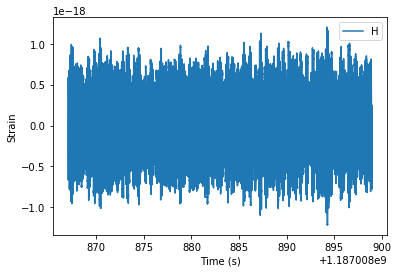

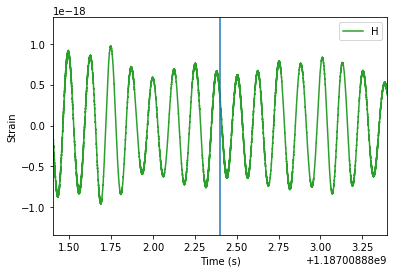

In [3]:
from pycbc import catalog
import pylab

event= catalog.Merger("GW170817") 
tim=event.time
print(event.time)

#Hanford  sample_rate=16384
'''
The sample rate is fs = 4096 Hz (2^12 Hz), so the data cannot capture frequency content 
above the Nyquist frequency = fs/2 = 2048 Hz. 
the upper end will (almost) always be below the Nyquist frequency. '''
strainhan= event.strain('H1',sample_rate=4096)
#strainhan2=event.strain('H1',sample_rate=16384)
pylab.plot(strainhan.sample_times, strainhan)
#pylab.plot(strainhan2.sample_times,strainhan2)
pylab.legend('Hanford')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()



pylab.plot(strainhan.sample_times, strainhan,'tab:green')
pylab.legend('Hanford')
pylab.xlabel('Time (s)')
pylab.axvline(tim)
pylab.xlim(tim-1,tim+1)
pylab.ylabel('Strain')
pylab.show()



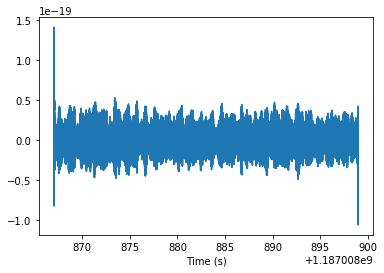

In [4]:
#Data analysis

from pycbc.filter import highpass
from pycbc.psd import interpolate, inverse_spectrum_truncation
#HANFORD
#Remove the low frequency content 
strainhan= highpass(strainhan, 15.0)
#resample_to_delta_t(, 1.0/2048) no for this case
pylab.plot(strainhan.sample_times, strainhan)
pylab.xlabel('Time (s)')
pylab.show()


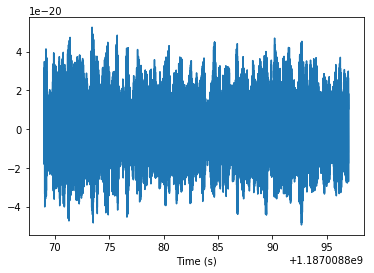

In [5]:
#Remove 2 seconds of data from both the beginning and end
#could be other number of  seconds
# Remove time corrupted by the high pass filter
conditionedhan= strainhan.crop(2,2)
pylab.plot(conditionedhan.sample_times, conditionedhan)
pylab.xlabel('Time (s)')
pylab.show()

#Frequency domain version of the data
#stildehan= strainhan.to_frequencyseries()



In [8]:
# Estimate the power spectral density
from pycbc.psd import interpolate, inverse_spectrum_truncation

'''
Welch method used in article: The spectral estimate used to whiten the data in Figure 2 was found by
applying a Welch average to 1024 s of data centered on GPS time 1126259462 (the
nearest integer GPS time to the peak of the GW150914 signal). The data were broken
up into overlapping 4 s long chunks, each spaced by 2 s.
'''

#We use 4 second samples of our time series in Welch method.
psdhan= conditionedhan.psd(4)
#Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner

psdhan= interpolate(psdhan, conditionedhan.delta_f)


Text(0.5,0,'Frequency (Hz)')

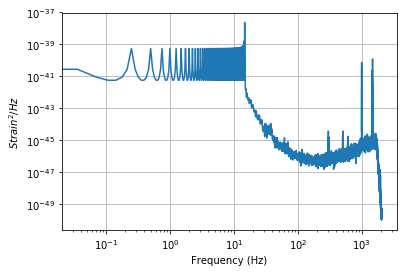

In [9]:
psdhan= inverse_spectrum_truncation(psdhan, 4 * conditionedhan.sample_rate,
                                  low_frequency_cutoff=15)

pylab.loglog(psdhan.sample_frequencies, psdhan)
pylab.grid()
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')

#xlim:depends on resolution, dates 16KHz----> 2048
#pylab.xlim(30,2048)
#pylab.xlim(30,1024)

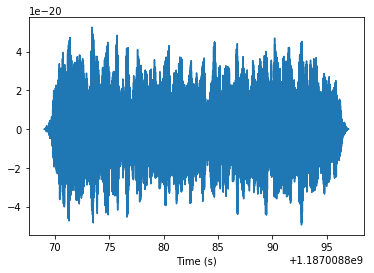

114688
114688
57345
57345


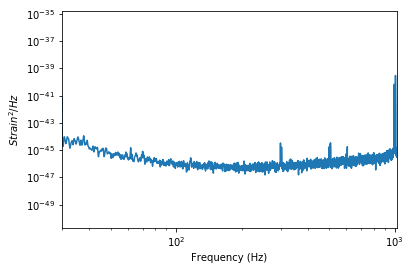

In [10]:
#Tukey Window

'''
We need to apply a window function 
to our time-domain data before transforming, which it can be done using the scipy.signal module:
'''

from scipy import signal
#from scipy.signal import get_window

windowhan= signal.tukey(len(conditionedhan),alpha=0.125)#The signal itself has a Tukey window (α =1/8)?
strainhanw =  conditionedhan * windowhan


#pylab.plot(strainhan.sample_times,strainhan,'tab:blue')
pylab.plot(strainhanw.sample_times,strainhanw)
pylab.xlabel('Time (s)')
pylab.show()



psdhanw= strainhanw.psd(4)
psdhanw= interpolate(psdhanw, strainhanw.delta_f)
psdhanw= inverse_spectrum_truncation(psdhanw, 4 * strainhanw.sample_rate,
                                  low_frequency_cutoff=30)


pylab.loglog(psdhanw.sample_frequencies, psdhanw)
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
#pylab.xlim(30, 2048)
pylab.xlim(30,1024)

'''

# We explicitly control how much data will be corrupted by overwhitening the data later on
# In this case we choose 2 seconds.
psds[ifo] = inverse_spectrum_truncation(psds[ifo], 2 * strain[ifo].sample_rate,
                                    low_frequency_cutoff=15.0,
                                    trunc_method='hann')


'''
print(len(conditionedhan))
print(len(strainhanw))
print(len(psdhan))
print(len(psdhanw))


114688


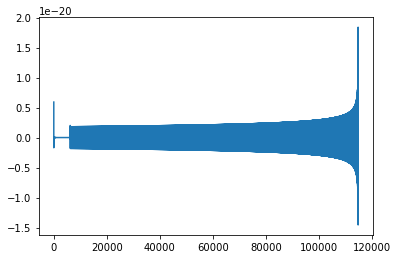

In [11]:
from pycbc.waveform import get_td_waveform
import pylab


#In a search we would grid over the parameters and calculate the SNR time series for each one
# Changing the parameters and  happens to the waveform
# and the resulting SNR.

hphan, hchan = get_td_waveform(approximant="SEOBNRv4T",  
                     mass1=1.35,
                     mass2=1.3795,#chirp mass equation
                     spin1z=0.0,    
                     spin2z=0.0,        
                     delta_t=1.0/4096 ,#4096
                     f_lower=40)#f_lower=20 is to low

hphan.resize(len(conditionedhan))


'''

m = 1.35 # Solar masses
hphan, hcan = get_td_waveform(approximant="SEOBNRv4T",
                     mass1=m,
                     mass2=m,
                     #delta_t=conditionedhan.delta_t,
                     delta_t=1.0/16384,         
                     f_lower=100)

hphan.resize(len(strainhanw))

print(1/conditionedhan.delta_t)

'''
# The waveform begins at the start of the vector, so if we want the
# SNR time series to correspond to the approximate merger location
# we need to shift the data so that the merger is approximately at the 
# first bin of the data.

# This function rotates the vector by a fixed amount of time.
# It treats the data as if it were on a ring. Note that
# time stamps are *not* in general affected, but the true
# position in the vector is.
#
# By convention waveforms returned from `get_td_waveform` have their
# merger stamped with time zero, so we can use the start time to 
# shift the merger into position
templatehan = hphan.cyclic_time_shift(hphan.start_time) ##
print(len(templatehan))
pylab.plot(templatehan)
pylab.show()

#print(len(conditionedhan))
#print(len(templatehan))
#print(len(strainhanw))

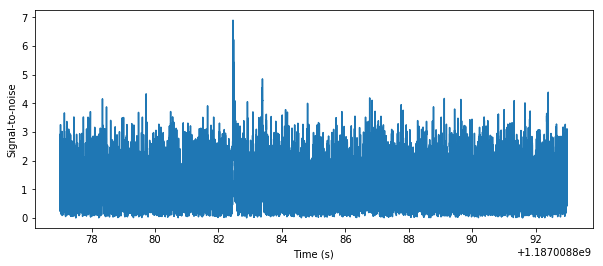

It is found a signal at 1187008882.46s with SNR 6.89511550825


In [12]:
# signal-to-noise time series
# Calculate the complex Signal-to-noise. This is a complex vector
# because the signal could have any phase

from pycbc.filter import matched_filter
import numpy



snrhan= matched_filter(templatehan,strainhanw,
                     psd=psdhanw, low_frequency_cutoff=30)
                     
               

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for 
# so short a template). A longer signal such as from a BNS, would 
# require much more padding at the beginning of the vector.
snrhan= snrhan.crop(4 + 4, 4)

# Why am I taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be 
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(snrhan.sample_times, abs(snrhan))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peakhan = abs(snrhan).numpy().argmax()
snrphan = snrhan[peakhan]
timehan = snrhan.sample_times[peakhan]

print("It is found a signal at {}s with SNR {}".format(timehan, 
                                                    abs(snrphan)))

Fetched 1 URLs from www.gw-osc.org for [1187008852 .. 1187008884))
Reading data... [Done]


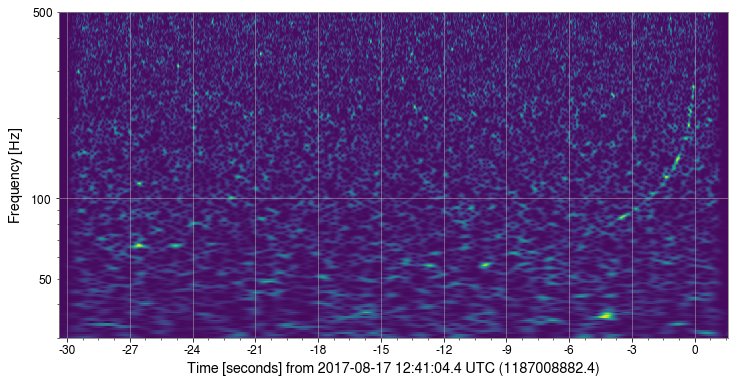

In [14]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
gps = event_gps('GW170817')
segment = (int(gps) - 30, int(gps) + 2)
hdata = TimeSeries.fetch_open_data('H1', *segment, tag='CLN', verbose=True, cache=True)
hq = hdata.q_transform(frange=(30, 500))
plot = hq.plot()

'''
This is because the highest energy time-frequency pixel was found with a low Q value (Q~=5), 
which doesn't work well for such long-duration signals as a binary neutron star.
We can rerun the Q-transform using a narrow Q range at higher Q (Q~=100), to resolve the BNS track much better:
'''
#qtransform without withen the data
hq = hdata.q_transform(frange=(30, 500), qrange=(100, 110)) 
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log') 




<function matplotlib.pyplot.show>

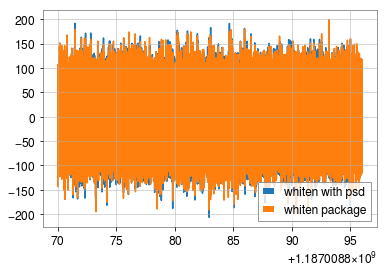

In [20]:
# Whiten the data : "it is make the psd more flat" . psd is diferrent
#in the region of frquency and that is reflected in qtransform background
whitenhan = (conditionedhan.to_frequencyseries() / psdhanw ** 0.5).to_timeseries()
#whitenhan=whitehan.whiten(4,4)

# Select the time around the event
zoomhan = whitenhan.time_slice(event.time - 10, event.time + 2)
#zoomhan=zoomhan.highpass_fir(30., 512).lowpass_fir(300, 512)


#pylab.plot(whitehan.sample_times, whitehan)
#pylab.show

whitenhan1=whitenhan.crop(2,2)

whitenhan2=conditionedhan.whiten(2,2)
#remove_corrupted=True)

pylab.plot(whitenhan1.sample_times, whitenhan1,label='whiten with psd') 
pylab.plot(whitenhan2.sample_times, whitenhan2,label='whiten package')
pylab.legend()
pylab.show

#zoomhan1 = whitehan1.time_slice(event.time - 1, event.time + 2)

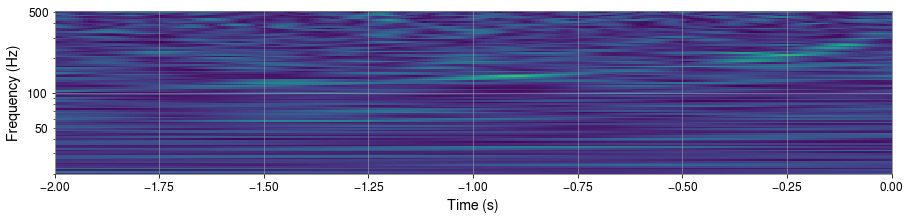

In [22]:
# qtransform whiten but no bandpass
times, freqs, power =whitenhan1.qtransform(.01, logfsteps=100, frange=(20, 512), qrange=(110, 110))
pylab.figure(figsize=(15,3))
pylab.pcolormesh(times - event.time, freqs, power**0.5, vmin=0, vmax=6)
pylab.ylim(20, 512)
pylab.xlim(-2,0)
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.yscale('log')

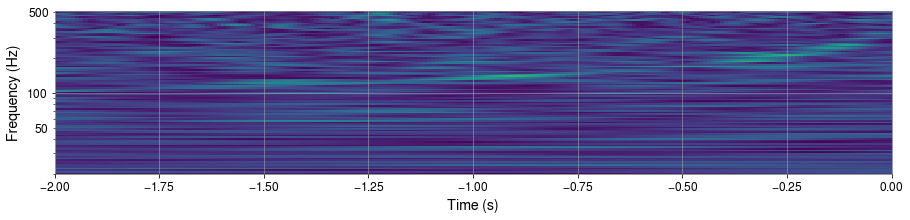

In [23]:
# qtransform whiten but no bandpass
times, freqs, power =whitenhan2.qtransform(.01, logfsteps=100, frange=(20, 512), qrange=(110, 110))
pylab.figure(figsize=(15,3))
pylab.pcolormesh(times - event.time, freqs, power**0.5, vmin=0, vmax=6)
pylab.ylim(20, 512)
pylab.xlim(-2,0)
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.yscale('log')

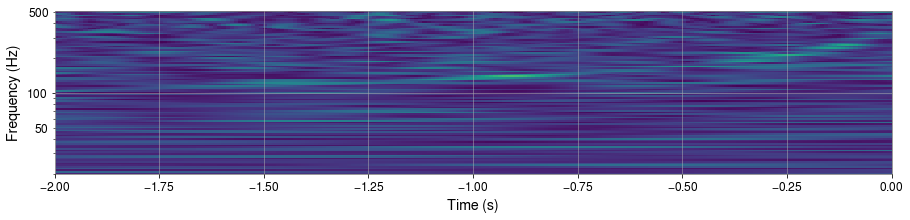

In [24]:
# qtransform whiten but no bandpass
times, freqs, power = zoomhan.qtransform(.01, logfsteps=100, frange=(20, 512), qrange=(110, 110))
pylab.figure(figsize=(15,3))
pylab.pcolormesh(times - event.time, freqs, power**0.5, vmin=0, vmax=6)
pylab.ylim(20, 512)
pylab.xlim(-2,0)
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.yscale('log')

<function matplotlib.pyplot.show>

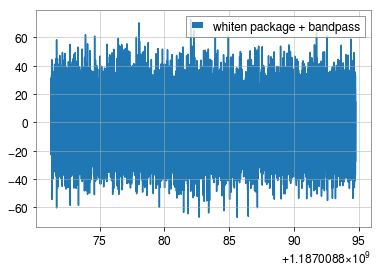

In [25]:
'''
Due to the 2048 Hz sampling rate of the witness sensors and a low pass filter applied to reduce corruption near the Nyquist frequency, broadband noise is only subtracted up to 1024 Hz.
A high pass filter applied at 13 Hz set the minimum frequency at which broadband noise was subtracted.

Simulations tell us that the remnant object that results from merging binary neutron stars also emits gravitational waves. In the short term,
less than 1 second after the merger, there is an expected gravitational wave signal in 
frequency range approximately 1000-4000 Hz
'''
whitenhan1=whitenhan1.highpass_fir(30., 512).lowpass_fir(300, 512)
#whitenhan1=whitenhan1.highpass_fir(500.,3000).lowpass_fir(1000, 4000)
#.lowpass_fir(300, 512)
#whitenhan1= whitehan1.time_slice(event.time-.2, event.time+.1)
pylab.plot(whitenhan1.sample_times, whitenhan1,label='whiten package + bandpass')#similar signal
pylab.legend()
pylab.show


<function matplotlib.pyplot.show>

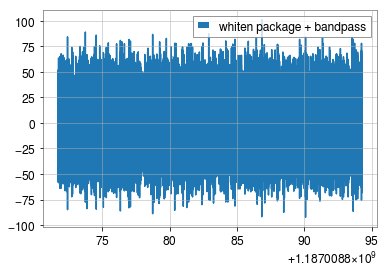

In [26]:
whitenhan2=whitenhan2.highpass_fir(500.,3000).lowpass_fir(1000, 4000)
#whitenhan2=whitenhan2.highpass_fir(30., 512).lowpass_fir(300, 512)
pylab.plot(whitenhan2.sample_times, whitenhan2,label='whiten package + bandpass')#similar signal
pylab.legend()
pylab.show

In [27]:
#Aligning and Subtracting the Proposed Signal

from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dthan = timehan - conditionedhan.start_time
alignedhan = templatehan.cyclic_time_shift(dthan)

# scale the template so that it would have SNR 1 in this data
alignedhan /= sigma(alignedhan, psd=psdhanw, low_frequency_cutoff=40.0)

# Scale the template amplitude and phase to the peak value
alignedhan = (alignedhan.to_frequencyseries() * snrphan).to_timeseries()
alignedhan.start_time = strainhanw.start_time

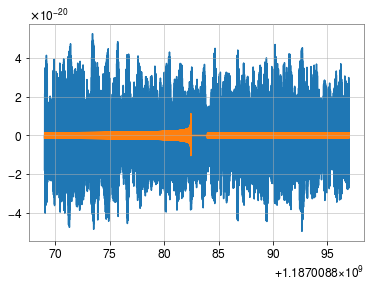

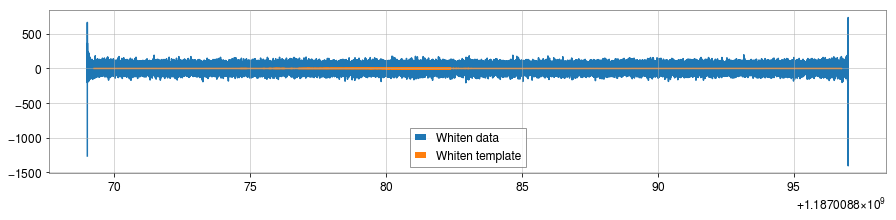

In [29]:
###
#taperedhan = alignedhan.highpass_fir(30, 512, remove_corrupted=False)
#white_template = (taperedhan.to_frequencyseries() / psdhanw**0.5).to_timeseries()
white_template = (alignedhan.to_frequencyseries() / psdhanw**0.5).to_timeseries()

#whitehan = whitehan.highpass_fir(30., 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)



# Select the time around the merger
#whitehan= whitehan.time_slice(event.time-.2, event.time+.1)
#white_template = white_template.time_slice(event.time-.2, event.time+.1)


pylab.plot(conditionedhan.sample_times, conditionedhan, label="Data")
pylab.plot(alignedhan.sample_times, alignedhan*100, label="Template")
pylab.show()

pylab.figure(figsize=[15, 3])
pylab.plot(whitenhan.sample_times, whitenhan, label="Whiten data")
pylab.plot(white_template.sample_times, white_template, label="Whiten template")
pylab.legend()
pylab.show()




"\n\n\nfor data, title in [(conditionedhan, 'Original H1 Data'),\n                    (subtractedhan, 'Signal Subtracted from H1 Data')]:\n\n    t, f, p = data.whiten(4, 4).qtransform(.001,\n                                                  logfsteps=100,\n                                                  qrange=(8, 8),\n                                                  frange=(20, 512))\n    pylab.figure(figsize=[15, 3])\n    pylab.title(title)\n    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)\n    pylab.yscale('log')\n    pylab.xlabel('Time (s)')\n    pylab.ylabel('Frequency (Hz)')\n    pylab.xlim(event.time - 2, event.time + 1)\n    pylab.show()\n\n"

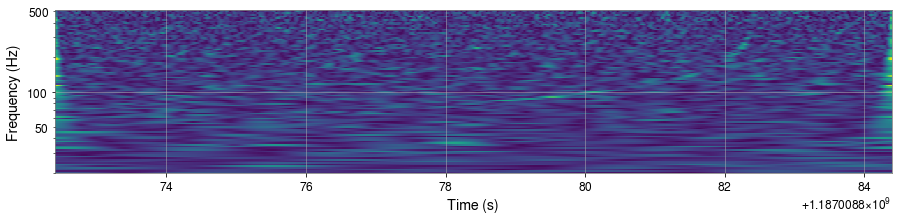

In [30]:
###
subtractedhan = conditionedhan - alignedhan

# Plot the original data and the subtracted signal data


# Select the time around the event
subtractedhan = subtractedhan.time_slice(event.time - 10, event.time + 2)

# Calculate the qtransform (a kind of time-frequency representation similar to a spectrogram)
times, freqs, power =subtractedhan.qtransform(.01, logfsteps=100, frange=(20, 512), qrange=(110, 110))

pylab.figure(figsize=(15,3))
pylab.pcolormesh(times, freqs, power**0.5, vmin=0, vmax=6)
pylab.ylim(20, 512)
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.yscale('log')


'''


for data, title in [(conditionedhan, 'Original H1 Data'),
                    (subtractedhan, 'Signal Subtracted from H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001,
                                                  logfsteps=100,
                                                  qrange=(8, 8),
                                                  frange=(20, 512))
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(event.time - 2, event.time + 1)
    pylab.show()

'''

In [100]:
'''
#Whiten the data and the template with the function whiten() and see the result is

print(event.time)

print(len(strainhan.sample_times))

white_data2= (conditionedhan.to_frequencyseries() / psdhanw**0.5).to_timeseries() #error 1

white_data3=conditionedhan.whiten(4, 4)

#white_data3=white_data3.lowpass_fir(250, 512)
#white_data3=white_data3.highpass_fir(35, 512).lowpass_fir(250, 512)
#white_template2=templatehan.whiten(4, 4)
#print(len(white_data2))

#white_data3 = white_data2.lowpass_fir(300, 512).highpass_fir(40., 512)
# Select the time around the merger
#white_data3 = white_data3.time_slice(event.time-0.02, event.time+0.01)
#z3=conditionedhan
#z3=z3.time_slice(event.time-0.02, event.time+0.01)
#white_data2 = white_data2.time_slice(1187008880, 1187008890)
#white_data2 = white_data2.time_slice(event.time-10, event.time+10)
#print(len(white_data2))
#white_template = white_template.time_slice(merger.time-.2, merger.time+.1)

pylab.figure(figsize=[15, 3])
pylab.plot(white_data2.sample_times, white_data2, label="Data")
pylab.plot(white_data3.sample_times, white_data3, label="Data")
#pylab.plot(z3.sample_times,z3, label="Data")
#pylab.plot(white_template2.sample_times, white_template2, label="Template")
pylab.legend()
pylab.show()
'''

'\n#Whiten the data and the template with the function whiten() and see the result is\n\nprint(event.time)\n\nprint(len(strainhan.sample_times))\n\nwhite_data2= (conditionedhan.to_frequencyseries() / psdhanw**0.5).to_timeseries() #error 1\n\nwhite_data3=conditionedhan.whiten(4, 4)\n\n#white_data3=white_data3.lowpass_fir(250, 512)\n#white_data3=white_data3.highpass_fir(35, 512).lowpass_fir(250, 512)\n#white_template2=templatehan.whiten(4, 4)\n#print(len(white_data2))\n\n#white_data3 = white_data2.lowpass_fir(300, 512).highpass_fir(40., 512)\n# Select the time around the merger\n#white_data3 = white_data3.time_slice(event.time-0.02, event.time+0.01)\n#z3=conditionedhan\n#z3=z3.time_slice(event.time-0.02, event.time+0.01)\n#white_data2 = white_data2.time_slice(1187008880, 1187008890)\n#white_data2 = white_data2.time_slice(event.time-10, event.time+10)\n#print(len(white_data2))\n#white_template = white_template.time_slice(merger.time-.2, merger.time+.1)\n\npylab.figure(figsize=[15, 3])\npy

In [101]:
'''
#Aligning and Subtracting the Proposed Signal
from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dthan = timehan - conditionedhan.start_time
alignedhan = templatehan.cyclic_time_shift(dthan)

# scale the template so that it would have SNR 1 in this data
alignedhan /= sigma(alignedhan, psd=psdhanw, low_frequency_cutoff=40.0)

# Scale the template amplitude and phase to the peak value
alignedhan = (alignedhan.to_frequencyseries() * snrphan).to_timeseries()
alignedhan.start_time = strainhanw.start_time
'''

'\n#Aligning and Subtracting the Proposed Signal\nfrom pycbc.filter import sigma\n# The time, amplitude, and phase of the SNR peak tell us how to align\n# our proposed signal with the data.\n\n# Shift the template to the peak time\ndthan = timehan - conditionedhan.start_time\nalignedhan = templatehan.cyclic_time_shift(dthan)\n\n# scale the template so that it would have SNR 1 in this data\nalignedhan /= sigma(alignedhan, psd=psdhanw, low_frequency_cutoff=40.0)\n\n# Scale the template amplitude and phase to the peak value\nalignedhan = (alignedhan.to_frequencyseries() * snrphan).to_timeseries()\nalignedhan.start_time = strainhanw.start_time\n'

In [102]:
'''
#other method
#white_data = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()
whitenedhanm2 = conditionedhan.whiten(4, 4)
zoomhan = conditionedhan.time_slice(event.time - 10., event.time + 6.)
pylab.plot(zoomhan.sample_times, zoomhan)
pylab.ylabel('Whitened Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()


# Apply a highpass filter (at 30 Hz) followed by an lowpass filter (at 250 Hz)
bpsdm2 = whitenedhan.lowpass_fir(250, 512)
#.highpass_fir(100, 512).
zoom = bpsd.time_slice(event.time - 0.5, event.time + 0.5)
pylab.plot(zoom.sample_times, zoom)
pylab.grid()
pylab.legend()
pylab.show()



#subtractedhan = conditionedhan - alignedhan


zoomhan = whitenedhan.time_slice(event.time - 10., event.time + 6.)
times, freqs, power =zoomhan.qtransform(.001, logfsteps=100,
                                                qrange=(8, 8),
                                                frange=(40, 512),
                                         )
pylab.figure(figsize=[15, 3])
pylab.pcolormesh(times, freqs, power**0.5)
pylab.xlim(event.time -5, event.time + 5)
pylab.yscale('log')
pylab.show()



times, freqs, power =white_data3.qtransform(.001, logfsteps=100,
                                                qrange=(8, 8),
                                                frange=(40, 512),
                                         )
pylab.figure(figsize=[15, 3])
pylab.pcolormesh(times, freqs, power**0.5)
pylab.xlim(event.time -5, event.time + 5)
pylab.yscale('log')
pylab.show()

'''


"\n#other method\n#white_data = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()\nwhitenedhanm2 = conditionedhan.whiten(4, 4)\nzoomhan = conditionedhan.time_slice(event.time - 10., event.time + 6.)\npylab.plot(zoomhan.sample_times, zoomhan)\npylab.ylabel('Whitened Strain')\npylab.xlabel('Time (s)')\npylab.legend()\npylab.show()\n\n\n# Apply a highpass filter (at 30 Hz) followed by an lowpass filter (at 250 Hz)\nbpsdm2 = whitenedhan.lowpass_fir(250, 512)\n#.highpass_fir(100, 512).\nzoom = bpsd.time_slice(event.time - 0.5, event.time + 0.5)\npylab.plot(zoom.sample_times, zoom)\npylab.grid()\npylab.legend()\npylab.show()\n\n\n\n#subtractedhan = conditionedhan - alignedhan\n\n\nzoomhan = whitenedhan.time_slice(event.time - 10., event.time + 6.)\ntimes, freqs, power =zoomhan.qtransform(.001, logfsteps=100,\n                                                qrange=(8, 8),\n                                                frange=(40, 512),\n                                         )

In [103]:
'''
#Visualize the overlap between the signal and data


#DOUBT: how to choose correct bandpass?


# We do it this way so that we can whiten both the template and the data
white_datahan = (strainhanw.to_frequencyseries() / psdhanw**0.5).to_timeseries()

# apply a smoothing of the turnon of the template to avoid a transient
# from the sharp turn on in the waveform.
#taperedhan = alignedhan.highpass_fir(40,2024, remove_corrupted=False)
white_templatehan = (taperedhan.to_frequencyseries() / psdhanw**0.5).to_timeseries()

white_datahan = white_datahan.highpass_fir(40, 2024).lowpass_fir(40,2024)#ead ,
white_templatehan = white_templatehan.highpass_fir(40, 2024).lowpass_fir(40, 2024)

pylab.figure(figsize=[15, 3])
pylab.plot(white_datahan.sample_times, white_datahan, label="Data")
pylab.plot(white_templatehan.sample_times, white_templatehan, label="Template")
pylab.legend()
pylab.show()
'''

'\n#Visualize the overlap between the signal and data\n\n\n#DOUBT: how to choose correct bandpass?\n\n\n# We do it this way so that we can whiten both the template and the data\nwhite_datahan = (strainhanw.to_frequencyseries() / psdhanw**0.5).to_timeseries()\n\n# apply a smoothing of the turnon of the template to avoid a transient\n# from the sharp turn on in the waveform.\n#taperedhan = alignedhan.highpass_fir(40,2024, remove_corrupted=False)\nwhite_templatehan = (taperedhan.to_frequencyseries() / psdhanw**0.5).to_timeseries()\n\nwhite_datahan = white_datahan.highpass_fir(40, 2024).lowpass_fir(40,2024)#ead ,\nwhite_templatehan = white_templatehan.highpass_fir(40, 2024).lowpass_fir(40, 2024)\n\npylab.figure(figsize=[15, 3])\npylab.plot(white_datahan.sample_times, white_datahan, label="Data")\npylab.plot(white_templatehan.sample_times, white_templatehan, label="Template")\npylab.legend()\npylab.show()\n'

In [104]:
'''
# Select the time around the merger
white_datahan = white_datahan.time_slice(event.time-.2, event.time+.1)
white_templatehan= white_templatehan.time_slice(event.time-.2, event.time+.1)

pylab.figure(figsize=[15, 3])
pylab.plot(white_datahan.sample_times, white_datahan, label="Data")
pylab.plot(white_templatehan.sample_times, white_templatehan, label="Template")
pylab.legend()
pylab.show()
'''

'\n# Select the time around the merger\nwhite_datahan = white_datahan.time_slice(event.time-.2, event.time+.1)\nwhite_templatehan= white_templatehan.time_slice(event.time-.2, event.time+.1)\n\npylab.figure(figsize=[15, 3])\npylab.plot(white_datahan.sample_times, white_datahan, label="Data")\npylab.plot(white_templatehan.sample_times, white_templatehan, label="Template")\npylab.legend()\npylab.show()\n'

In [105]:
'''

#DOUBT: what is incorrect?

subtractedhan= conditionedhan - alignedhan

# Plot the original data and the subtracted signal data

for data, title in [(conditionedhan, 'Original H1 Data'),
                    (subtractedhan, 'Signal Subtracted from H1 Data')]:

    times, freqs, power = data.whiten(4, 4).qtransform(0.001,
                                                  logfsteps=100,
                                                  qrange=(8, 8),
                                                  frange=(20,512))
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(times, freqs, power**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(event.time - 2, event.time + 1)
    pylab.show()

'''

"\n\n#DOUBT: what is incorrect?\n\nsubtractedhan= conditionedhan - alignedhan\n\n# Plot the original data and the subtracted signal data\n\nfor data, title in [(conditionedhan, 'Original H1 Data'),\n                    (subtractedhan, 'Signal Subtracted from H1 Data')]:\n\n    times, freqs, power = data.whiten(4, 4).qtransform(0.001,\n                                                  logfsteps=100,\n                                                  qrange=(8, 8),\n                                                  frange=(20,512))\n    pylab.figure(figsize=[15, 3])\n    pylab.title(title)\n    pylab.pcolormesh(times, freqs, power**0.5, vmin=1, vmax=6)\n    pylab.yscale('log')\n    pylab.xlabel('Time (s)')\n    pylab.ylabel('Frequency (Hz)')\n    pylab.xlim(event.time - 2, event.time + 1)\n    pylab.show()\n\n"

In [106]:
'''
#Others

#from gwosc import datasets
#datasets.event_gps('GW170817')
#from gwosc.locate import get_event_urls
#urls = get_event_urls('GW170817',sample_rate=4096)
#urls1 = get_event_urls('GW170817',sample_rate=16384) 
#print(urls1)
stildehan = conditionedhan.to_frequencyseries()
print(stildehan)

print(stildehan.delta_f)
print
print(psdhan.delta_f)
print(psdhanw.delta_f)



from gwpy.timeseries import TimeSeries
hphan2, hchan2 = get_td_waveform(approximant="SEOBNRv4",
                     mass1=1.35,
                     mass2=1.3795,#chirp mass equation
                     delta_t=1.0/16384,
                     delta_f=psdhan.delta_f,         
                     f_lower=20)

templatehan2 = hphan.cyclic_time_shift(hphan2.start_time)

print(len(templatehan2))
print(len(psdhan))
print(len(psdhanw))


from pycbc.filter import matched_filter
import numpy



#DOUBT

snrhan2= matched_filter(templatehan2, strainhanw,
                     psd=psdhan, low_frequency_cutoff=20)
                     




hphan2, hchan2 = get_td_waveform(approximant="SEOBNRv4",
                     mass1=1.35,
                     mass2=1.3795,#chirp mass equation
                     delta_t=1.0/16384,
                     f_lower=20)

# We will resize the vector to match our data
hphan2.resize(len(conditionedhan))
templatehan2 = hphan.cyclic_time_shift(hphan2.start_time) ##

psdhan2 = interpolate(Welch(conditionedhan), 1.0 / conditionedhan.duration)


snrhan2= matched_filter(templatehan2, conditionedhan,
                     psd=psdhan2, low_frequency_cutoff=20)



from pycbc.types import FrequencySeries
from pycbc.waveform import get_fd_waveform


#Problem is here

print(psdhan.delta_f)
print(psdhanw.delta_f)
print(templatehan.delta_f)

from gwpy.timeseries import TimeSeries

hphan2, _ = get_fd_waveform(approximant="SEOBNRv4", mass1=1.35, mass2=1.3795,
                        f_lower=20, f_final=2048, delta_f=psdhan.df.value)


hphan2, hchan2 = get_fd_waveform(approximant="SEOBNRv4",
                     mass1=1.35,
                     mass2=1.3795,#chirp mass equation
                     delta_t=1.0/16384,
                     delta_f=psdhan2.df.value,         
                     f_lower=20)
                     
                 

# We will resize the vector to match our data
hphan2.resize(len(conditionedhan))
templatehan2 = hphan2.cyclic_time_shift(hphan2.start_time)

print(psdhan.delta_f)
print(psdhanw.delta_f)
print(templatehan2.delta_f)


other method, same problem

from gwpy.timeseries import TimeSeries

#conditionedhan= strainhan.crop(2,2)

from gwpy.timeseries import TimeSeries
#psdhan2=conditionedhan.psd(4, 2)

psdhan2=conditionedhan.psd(4)
zoom = conditionedhan



from pycbc.waveform import get_fd_waveform


hphan2, hchan2= get_td_waveform(approximant="SEOBNRv4",
                     mass1=1.35,
                     mass2=1.3795,#chirp mass equation
                     delta_t=1.0/16384,
                     f_lower=20,f_final=2048)
#hp, _ = get_fd_waveform(approximant="IMRPhenomD", mass1=40, mass2=32,
#                        f_lower=20, f_final=2048, delta_f=psdhan2.df.value)

hphan2.resize(len(conditionedhan))

from pycbc.filter import matched_filter
snrhan2 = matched_filter(hphan2, zoom, psd=psdhan2,
                     low_frequency_cutoff=15)
snrts2 = TimeSeries.from_pycbc(snr).abs()


plot = snrts.plot()
ax = plot.gca()
ax.set_ylabel('Signal-to-noise ratio (SNR)')
ax.set_title('LIGO-Hanford signal-correlation ')
plot.show()


'''

'''
#Tukey window

from scipy import signal
#from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt



window = signal.tukey(51,alpha=0.25)
plt.plot(window)
plt.title("Tukey window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.ylim([0, 1.1])



plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Tukey window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
'''

'\n#Tukey window\n\nfrom scipy import signal\n#from scipy.fft import fft, fftshift\nimport matplotlib.pyplot as plt\n\n\n\nwindow = signal.tukey(51,alpha=0.25)\nplt.plot(window)\nplt.title("Tukey window")\nplt.ylabel("Amplitude")\nplt.xlabel("Sample")\nplt.ylim([0, 1.1])\n\n\n\nplt.figure()\nA = fft(window, 2048) / (len(window)/2.0)\nfreq = np.linspace(-0.5, 0.5, len(A))\nresponse = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))\nplt.plot(freq, response)\nplt.axis([-0.5, 0.5, -120, 0])\nplt.title("Frequency response of the Tukey window")\nplt.ylabel("Normalized magnitude [dB]")\nplt.xlabel("Normalized frequency [cycles per sample]")\n'

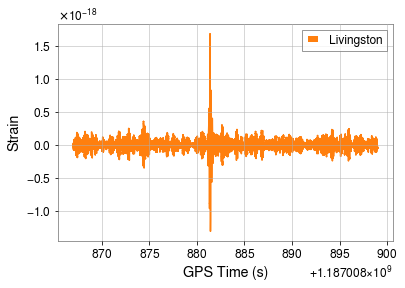

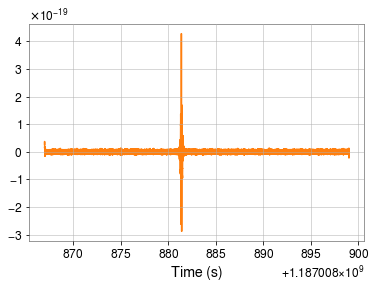

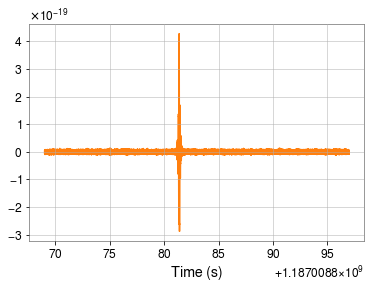

In [107]:
#Data analysis
from pycbc.filter import highpass
from pycbc.psd import interpolate, inverse_spectrum_truncation
#Livinston
#strainliv= event.strain('L1',sample_rate=16384)
strainliv= event.strain('L1',sample_rate=4096)
pylab.plot(strainliv.sample_times, strainliv,'tab:orange', label='Livingston')

pylab.ylabel('Strain')
pylab.xlabel('GPS Time (s)')
pylab.legend()
pylab.show()


strainliv= highpass(strainliv, 15.0)
pylab.plot(strainliv.sample_times, strainliv,'tab:orange')
pylab.xlabel('Time (s)')
pylab.show()

conditionedliv= strainliv.crop(2,2)
pylab.plot(conditionedliv.sample_times, conditionedliv,'tab:orange')
pylab.xlabel('Time (s)')
pylab.show()

Fetched 1 URLs from www.gw-osc.org for [1187008852 .. 1187008884))
Reading data... [Done]


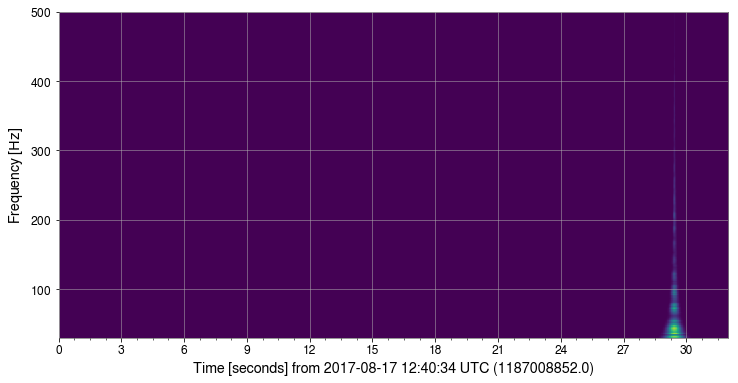

In [116]:
#

ldata = TimeSeries.fetch_open_data('L1', *segment, tag='CLN', verbose=True)
lq = ldata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = lq.plot()

# Notice that there is a glitch that overlapped with the signal in LIGO-Livingston data

